In [1]:
import data
import training
import eval

In [2]:
#Laptop
#root = "C:/Users/20182573/Documents/CityScapes"

#Desktop
root = 'E:/Cityscapes'

In [3]:
transforms = data.getTransforms(subsize=(256,512))
train_set, val_set = data.loadData(root=root, transforms=transforms,verbose=True)
train_dl, val_dl = data.getDataLoader(train_set=train_set, val_set=val_set, batch_size=1)


Size of the training set: 2380
Size of the validation set: 595


In [4]:
#eval.showImageAndTarget(train_dl)

In [5]:
from torch.utils.data import random_split, DataLoader
subset_small, subset_big = random_split(train_set, [0.0001,0.9999])
print(len(subset_small))
overfit_dl = DataLoader(subset_small, batch_size=1)

model, loss_fn, optimizer, device = training.buildModel(verbose=True)

1
Working on device: cuda:0


In [16]:
for i in range(200):
    training.trainModel(dataloader=overfit_dl, model=model, loss_fn=loss_fn,optimizer=optimizer,device=device,wenb=False,verbose=True)

loss: 0.064311  [    1/    1]
loss: 0.064289  [    1/    1]
loss: 0.064482  [    1/    1]
loss: 0.064509  [    1/    1]
loss: 0.063749  [    1/    1]
loss: 0.062735  [    1/    1]
loss: 0.062759  [    1/    1]
loss: 0.062418  [    1/    1]
loss: 0.061784  [    1/    1]
loss: 0.061683  [    1/    1]
loss: 0.061183  [    1/    1]
loss: 0.060857  [    1/    1]
loss: 0.060589  [    1/    1]
loss: 0.060120  [    1/    1]
loss: 0.059942  [    1/    1]
loss: 0.059476  [    1/    1]
loss: 0.059268  [    1/    1]
loss: 0.058925  [    1/    1]
loss: 0.058578  [    1/    1]
loss: 0.058354  [    1/    1]
loss: 0.057948  [    1/    1]
loss: 0.057732  [    1/    1]
loss: 0.057390  [    1/    1]
loss: 0.057112  [    1/    1]
loss: 0.056831  [    1/    1]
loss: 0.056522  [    1/    1]
loss: 0.056269  [    1/    1]
loss: 0.055962  [    1/    1]
loss: 0.055704  [    1/    1]
loss: 0.055419  [    1/    1]
loss: 0.055145  [    1/    1]
loss: 0.054881  [    1/    1]
loss: 0.054609  [    1/    1]
loss: 0.05

In [17]:
image, target, prediction = eval.getImageTargetAndPrediction(overfit_dl,model)

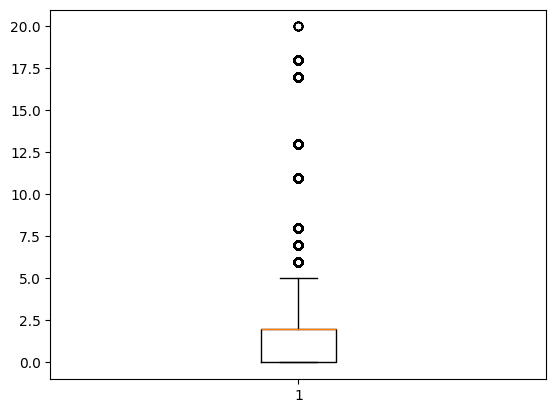

In [18]:
eval.showPixelValues(prediction)

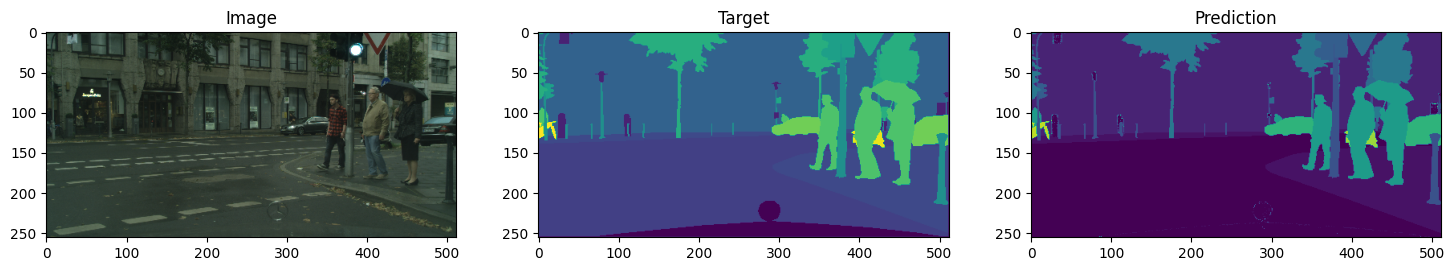

In [19]:
eval.showImageTargetAndPrediction(image, target, prediction)

In [15]:
import numpy as np
y, x = 50,60
print(f'Target: {np.array(target)[x,y]}')
print(f'Prediciton: {np.array(prediction)[x,y]}')

Target: 11
Prediciton: 2
